# **Proyek Akhir: Bike Sharing**

---

### Dicoding Submission
### Belajar Analisis Data dengan Python

---

# Data Diri

Nama: Andrew Benedictus Jamesie

E-mail: andrewbjamesie@yahoo.com

Dicoding ID: <a href='https://www.dicoding.com/users/andrewbj' target='_blank' title='Andrew Benedictus Jamesie | Dicoding'>andrewbj</a>

---

# **1. Menentukan Pertanyaan Bisnis**

- Bagaimana pola penggunaan layanan *bike sharing* berubah sepanjang tahun, bulan, dan jam?
- Apakah ada perbedaan penggunaan layanan *bike sharing* pada hari libur?
- Apakah ada perbedaan penggunaan layanan *bike sharing* pada hari kerja?
- Bagaimana cuaca memengaruhi penggunaan layanan *bike sharing*?
- Bagaimana musim mempengaruhi penggunaan layanan *bike sharing*?
- Apa saja faktor lingkungan yang berkontribusi terhadap penggunaan layanan *bike sharing*?

# **2. Library Import**

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

- Library <a href='https://docs.python.org/3/library/os.html' target='_blank' title='os - operating system | Python'>`os`</a> untuk melakukan operasi atau bekerja dengan lingkungan *operating system* (OS) Google Colab.
- Library <a href='https://docs.python.org/3/library/zipfile.html' target='_blank' title='zipfile | Python'>`zipfile`</a> untuk melakukan *read* dan *write* *file* ZIP.
- Library <a href='https://numpy.org' target='_blank' title='NumPy | Python'>`numpy`</a> untuk melakukan komputasi numerik berupa himpunan, *array*, matriks multididmensi, dan vektorisasi.
- Library <a href='https://pandas.pydata.org' target='_blank' title='Pandas | Python'>`pandas`</a> untuk melakukan pemrosesan, analisis, dan manipulasi data.
- Library <a href='https://seaborn.pydata.org' target='_blank' title='Seaborn | Python'>`seaborn`</a> untuk membuat visualisasi data statistik yang berbasis `matplotlib`.
- Library <a href='https://matplotlib.org' target='_blank' title='Matplotlib | Python'>`matplotlib`</a> untuk melakukan visualisasi menggunakan *plotting*.
- Library `files` untuk melakukan *upload* maupun *download*, dari dan ke *session storage* Google Colaboratory.

# **3. Data Wrangling**

## **3.1 Data Loading**

Dataset yang digunakan dalam proyek analisis data ini adalah <a href='https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ' target='_blank' title='Bike Sharing Dataset | Google Drive'>Bike Sharing Dataset</a> yang disediakan oleh Dicoding Indonesia melalui Google Drive. Dataset yang digunakan berupa file CSV (<a href='https://en.wikipedia.org/wiki/Comma-separated_values' target='_blank' title='Comma-separated Values | Wikipedia'>Comma-separated Values</a>), yaitu `day.csv` dan `hour.csv`. Mengunduh dataset tersebut menggunakan perintah `!gdown`.

In [2]:
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 23.8MB/s]


Melakukan ekstraksi atau *unzip* file dataset yang telah diunduh sebelumnya menggunakan `zipfile`.

In [3]:
local_zip = 'Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('bike-sharing-dataset')
zip_ref.close()

Melihat direktori file dataset yang telah di ekstrak atau *unsip*.

In [4]:
base_dir = 'bike-sharing-dataset/'
print(os.listdir(base_dir))

['day.csv', 'Readme.txt', 'hour.csv']


## **3.2 Gathering Data**

Melihat isi dataset `day.csv` dalam bentuk DataFrame.

In [5]:
df_day = pd.read_csv(base_dir + 'day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Melihat isi dataset `hour.csv` dalam bentuk DataFrame.

In [6]:
df_hour = pd.read_csv(base_dir + 'hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## **3.3 Assessing Data**

### **3.3.1 Dataset Information**

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi DataFrame `df_day` di atas, dapat dilihat bahwa terdapat sebanyak 16 kolom atau atribut data, sebanyak 731 baris data *non-null* untuk semua kolom data, dengan tipe data `float64` sebanyak 4 kolom data, `int64` sebanyak 11 kolom data, dan `object` sebanyak 1 kolom data.

Namun, setelah melakukan analisis lebih lanjut, terdapat kesalahan dalam tipe data pada kolom `dteday`, yaitu `object` yang seharusnya bertipe data `datetime64`.

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi DataFrame `df_hour` di atas, dapat dilihat bahwa terdapat sebanyak 16 kolom atau atribut data, sebanyak 17379 baris data *non-null* untuk semua kolom data, dengan tipe data `float64` sebanyak 4 kolom data, `int64` sebanyak 12 kolom data, dan `object` sebanyak 1 kolom data.

Namun, setelah melakukan analisis lebih lanjut, terdapat kesalahan dalam tipe data pada kolom `dteday`, yaitu `object` yang seharusnya bertipe data `datetime64`.

### **3.3.2 Missing Value Checking**

In [9]:
print('Jumlah data df_day yang terdapat missing value')
print(df_day.isnull().sum())
print()
print('Jumlah data df_hour yang terdapat missing value')
print(df_hour.isnull().sum())

Jumlah data df_day yang terdapat missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data df_hour yang terdapat missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil pengamatan dan pengecekan *missing value* atau data yang hilang (`NaN`) untuk masing-masing DataFrame `df_day` dan `df_hour`, dapat dilihat bahwa tidak terdapat *missing value* pada kedua DataFrame tersebut.

### **3.3.3 Duplicate Data Checking**

In [10]:
print(f'Jumlah data df_day duplikat  : {df_day.duplicated().sum()}')
print(f'Jumlah data df_hour duplikat : {df_hour.duplicated().sum()}')

Jumlah data df_day duplikat  : 0
Jumlah data df_hour duplikat : 0


Berdasarkan hasil pengamatan dan pengecekan data duplikat untuk masing-masing DataFrame `df_day` dan `df_hour`, dapat dilihat bahwa tidak terdapat duplikasi data pada kedua DataFrame tersebut.

### **3.3.4 Desripsi Statistik Dataset**

In [11]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan informasi atau deksripsi statistik untuk DataFrame `df_day` di atas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atirbut masing-masing data dari DataFrame tersebut.

In [12]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan informasi atau deksripsi statistik untuk DataFrame `df_hour` di atas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atirbut masing-masing data dari DataFrame tersebut.

### **3.3.5 Data Cleaning**

Memperbaiki tipe data pada kolom `dteday` untuk masing-masing DataFrame `df_day` dan juga `df_hour` yang bertipe `object` menjadi `datetime64`.

In [13]:
df_day.dteday = pd.to_datetime(df_day.dteday)
df_hour.dteday = pd.to_datetime(df_hour.dteday)

Melihat dan melakukan pengecekan ulang informasi DataFrame `df_day` untuk tipe data kolom `dteday` yang telah berubah menjadi `datetime64`.

In [14]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Melihat dan melakukan pengecekan ulang informasi DataFrame `df_hour` untuk tipe data kolom `dteday` yang telah berubah menjadi `datetime64`.

In [15]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# **4 Exploratory Data Analysis (EDA)**

Melihat isi dataset dalam bentuk DataFrame.

In [16]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Melihat deskripsi atau informasi dataset yang diberikan oleh pemilik atau *author* dataset.

In [17]:
f = open(base_dir + 'Readme.txt', 'r')

print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Pada bagian **Dataset characteristics** dapat dilihat bahwa terdapat beberapa informasi penting yang bisa kita peroleh untuk memproses lebih lanjut dataset tersebut.

|  Kolom Data  | Keterangan |
|--------------|------------|
| `season`     | Telah mengalami proses *label encoding*, pengubahan dari data bertipe *string* menjadi numerik. |
| `yr`         | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari tahun menjadi numerik. |
| `holiday`    | Telah mengalami proses *binary encoding*, pengubahan dari data bertipe *string* menjadi nilai *boolean*. |
| `weekday`    | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari hari menjadi numerik. |
| `workingday` | Telah mengalami proses *label encoding*, pengubahan dari data bertipe *string* menjadi nilai *boolean*. |
| `weathersit` | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari tingkatan jenis cuaca bertipe *string* menjadi numerik. |
| `temp`       | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 41 (max). |
| `atemp`      | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 50 (max). |
| `hum`        | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 100 (max). |
| `windspeed`  | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 67 (max). |

## **4.1 Label and Ordinal Decoding**

Berdasarkan dataset yang digunakan, beberapa kolom atau atribut data telah melalui tahap *label* dan *ordinal encoding*. Oleh karena itu, perlu mengembalikan nilai aslinya dengan menggunakan teknik *label* dan *ordinal decoding*.

In [18]:
df_day.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

df_hour.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

In [19]:
print('df_day Unique Value')
print(f'season     : {df_day.season.unique()}')
print(f'yr         : {df_day.yr.unique()}')
print(f'holiday    : {df_day.holiday.unique()}')
print(f'workingday : {df_day.workingday.unique()}')
print(f'weekday    : {df_day.weekday.unique()}')
print(f'weathersit : {df_day.weathersit.unique()}\n')

print('df_hour Unique Value')
print(f'season     : {df_hour.season.unique()}')
print(f'yr         : {df_hour.yr.unique()}')
print(f'holiday    : {df_hour.holiday.unique()}')
print(f'workingday : {df_hour.workingday.unique()}')
print(f'weekday    : {df_hour.weekday.unique()}')
print(f'weathersit : {df_hour.weathersit.unique()}')

df_day Unique Value
season     : ['Springer' 'Summer' 'Fall' 'Winter']
yr         : [2011 2012]
holiday    : ['Not Holiday' 'Holiday']
workingday : ['Holiday' 'Working Day']
weekday    : ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit : ['Mist + Cloudy' 'Clear' 'Light Snow']

df_hour Unique Value
season     : ['Springer' 'Summer' 'Fall' 'Winter']
yr         : [2011 2012]
holiday    : ['Holiday' 'Not Holiday']
workingday : ['Holiday' 'Working Day']
weekday    : ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit : ['Clear' 'Mist + Cloudy' 'Light Snow' 'Heavy Rain']


## **4.2 Denormalize Numeric Value**

Sama juga dengan data kategorical di atas, beberapa kolom atau atribut data pada dataset yang digunakan telah melewati proses normalisasi, sehingga perlu mengembalikannya ke nilai aslinya dengan cara denormalisasi nilai.

In [20]:
df_day.temp = df_day.temp.multiply(41)
df_day.atemp = df_day.atemp.multiply(50)
df_day.hum = df_day.hum.multiply(100)
df_day.windspeed = df_day.windspeed.multiply(67)

df_hour.temp = df_hour.temp.multiply(41)
df_hour.atemp = df_hour.atemp.multiply(50)
df_hour.hum = df_hour.hum.multiply(100)
df_hour.windspeed = df_hour.windspeed.multiply(67)

In [21]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,12,Not Holiday,Thu,Working Day,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,Springer,2012,12,Not Holiday,Fri,Working Day,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,Springer,2012,12,Not Holiday,Sat,Holiday,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,Springer,2012,12,Not Holiday,Sun,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [22]:
df_day.describe()

,instant,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [23]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,Holiday,Mon,Working Day,Clear,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,Holiday,Mon,Working Day,Clear,10.66,13.635,56.0,8.9981,13,48,61


In [24]:
df_hour.describe()

,instant,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,6.537775,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,2011.000000,1.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,4.000000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,7.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,10.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,12.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## **4.3 Data Distribution**

### **4.3.1 Categorical Data**

Melihat distribusi dan jumlah data untuk data kategorikal, yaitu `season`, `yr`, `mnth`, `holiday`, `workingday`, `weekday`, dan `weathersit`.

In [25]:
print('df_day Data Distribution\n')
print(f'{df_day.season.value_counts().sort_index()}\n')
print(f'{df_day.yr.value_counts().sort_index()}\n')
print(f'{df_day.mnth.value_counts().sort_index()}\n')
print(f'{df_day.holiday.value_counts().sort_index()}\n')
print(f'{df_day.workingday.value_counts().sort_index()}\n')
print(f'{df_day.weekday.value_counts().sort_index()}\n')
print(f'{df_day.weathersit.value_counts().sort_index()}\n')

df_day Data Distribution

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

2011    365
2012    366
Name: yr, dtype: int64

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

Holiday         21
Not Holiday    710
Name: holiday, dtype: int64

Holiday        231
Working Day    500
Name: workingday, dtype: int64

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64



In [26]:
print('df_hour Data Distribution\n')
print(f'{df_hour.season.value_counts().sort_index()}\n')
print(f'{df_hour.yr.value_counts().sort_index()}\n')
print(f'{df_hour.mnth.value_counts().sort_index()}\n')
print(f'{df_hour.holiday.value_counts().sort_index()}\n')
print(f'{df_hour.workingday.value_counts().sort_index()}\n')
print(f'{df_hour.weekday.value_counts().sort_index()}\n')
print(f'{df_hour.weathersit.value_counts().sort_index()}\n')

df_hour Data Distribution

Fall        4496
Springer    4242
Summer      4409
Winter      4232
Name: season, dtype: int64

2011    8645
2012    8734
Name: yr, dtype: int64

1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: mnth, dtype: int64

Holiday        16879
Not Holiday      500
Name: holiday, dtype: int64

Holiday         5514
Working Day    11865
Name: workingday, dtype: int64

Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: weekday, dtype: int64

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64



### **4.3.2 Numerical Data**

Melihat distribusi data untuk data numerik, yaitu `temp`, `atemp`, `hum`, dan `windspeed`.

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

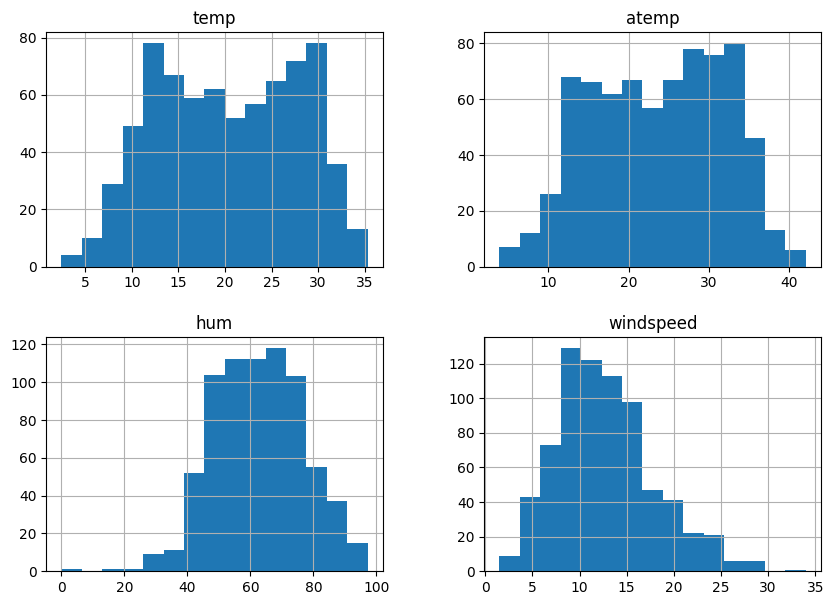

In [27]:
df_day_num = df_day[['temp', 'atemp', 'hum', 'windspeed']]
df_day_num.hist(bins=15, figsize=(10, 7))

Berdasarkan hasil pengamatan plot atau grafik histogram untuk DataFrame `df_day` di atas, dapat dilihat bahwa:
- Kolom `temp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `atemp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `hum` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `windspeed` memiliki bentuk histogram yang *right-skewed* (*positive skewness*).

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

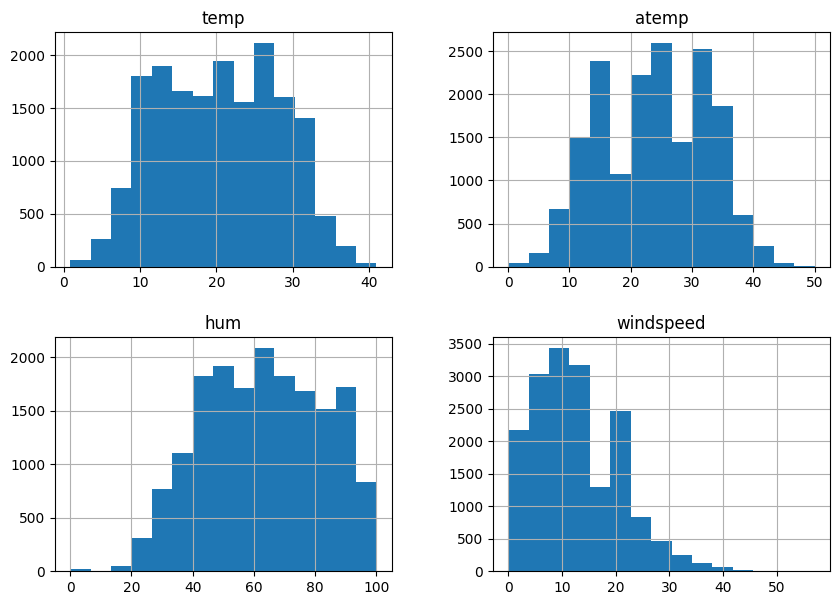

In [28]:
df_hour_num = df_hour[['temp', 'atemp', 'hum', 'windspeed']]
df_hour_num.hist(bins=15, figsize=(10, 7))

Berdasarkan hasil pengamatan plot atau grafik histogram untuk DataFrame `df_hour` di atas, dapat dilihat bahwa:
- Kolom `temp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `atemp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `hum` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `windspeed` memiliki bentuk histogram yang *right-skewed* (*positive skewness*).

### **4.3.3 Heatmap Correlation Matrix**

Melakukan pengecekan korelasi antar fitur numerik dengan menggunakan visualisasi diagram *heatmap correlation matrix*.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik df_day')

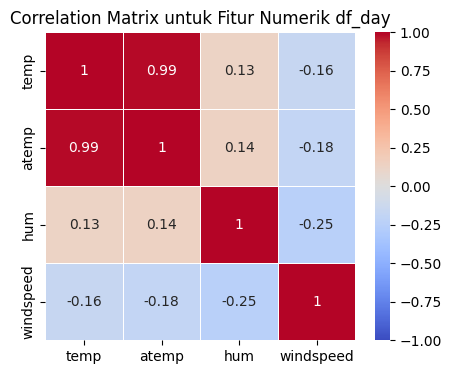

In [29]:
plt.figure(figsize=(5, 4))
correlationMatrix = df_day_num.corr().round(2)

sns.heatmap(
    data=correlationMatrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik df_day')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik df_hour')

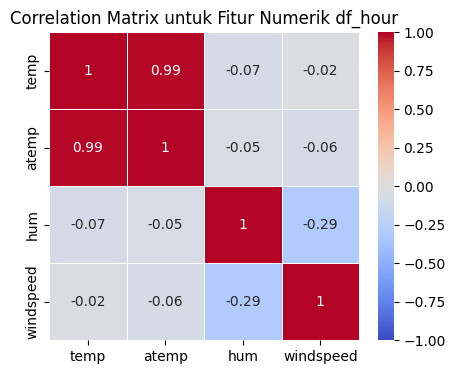

In [30]:
plt.figure(figsize=(5, 4))
correlationMatrix = df_hour_num.corr().round(2)

sns.heatmap(
    data=correlationMatrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik df_hour')

Dapat dilihat pada grafik atau diagram *heatmap* di atas memiliki *range* atau rentang dari angka 1.0 hingga -1.0 dengan keterangan sebagai berikut,
- Jika semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif.
- Jika semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah.
- Jika semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.


- Jika korelasi bernilai positif, berarti nilai kedua fitur numerik cenderung meningkat bersama-sama.
- Jika korelasi bernilai negatif, berarti nilai salah satu fitur numerik cenderung meningkat ketika nilai fitur numerik yang lain menurun.

Berdasarkan hasil pengamatan grafik atau diagram *heatmap correlation matrix* untuk masing-masing DataFrame `df_day` dan `df_hour`, dapat dilihat bahwa keduanya memiliki korelasi yang sangat kuat bernilai positif pada kolom atau atribut data `temp` dan `atemp`. Sedangkan pada kolom atau atribut data `hum` dan `windspeed` hampir sama sekali tidak memiliki korelasi dengan kolom atau atribut data yang lainnya.

### **4.3.4 Multivariate Analysis**

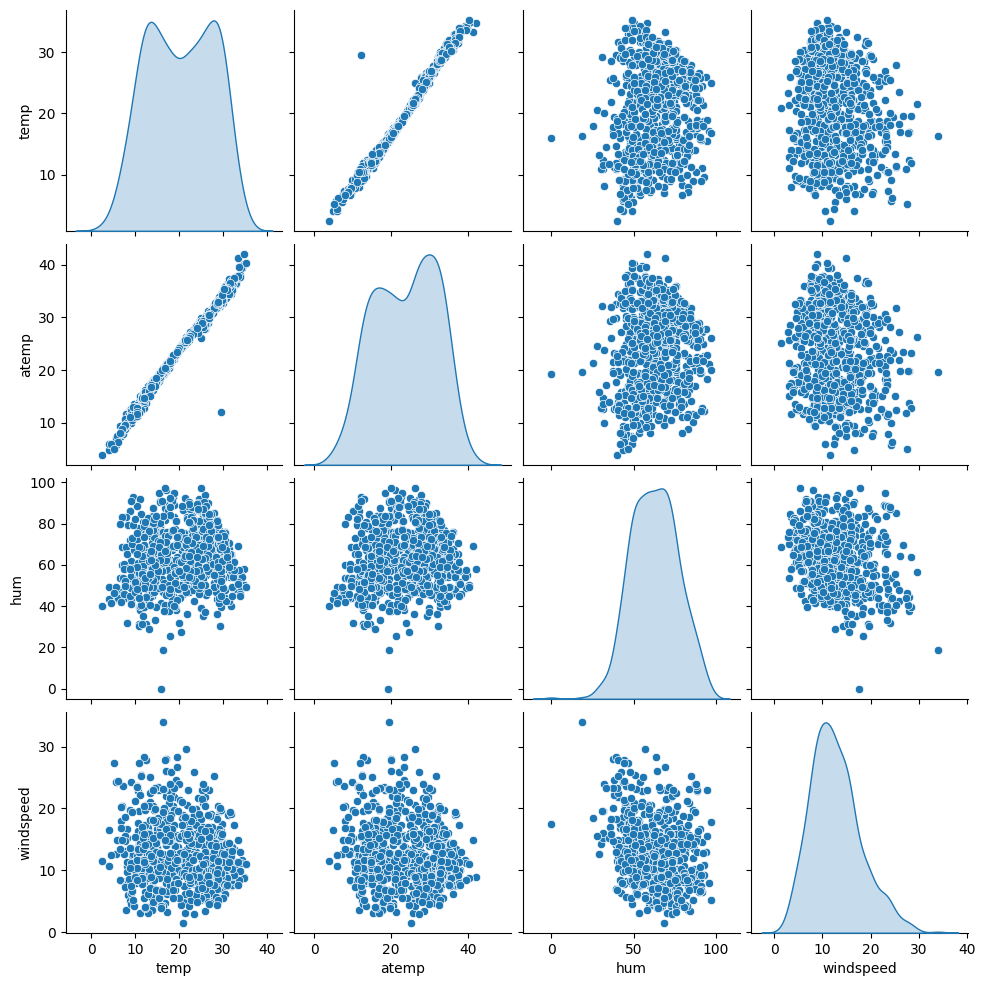

In [31]:
sns.pairplot(data=df_day_num, diag_kind='kde')

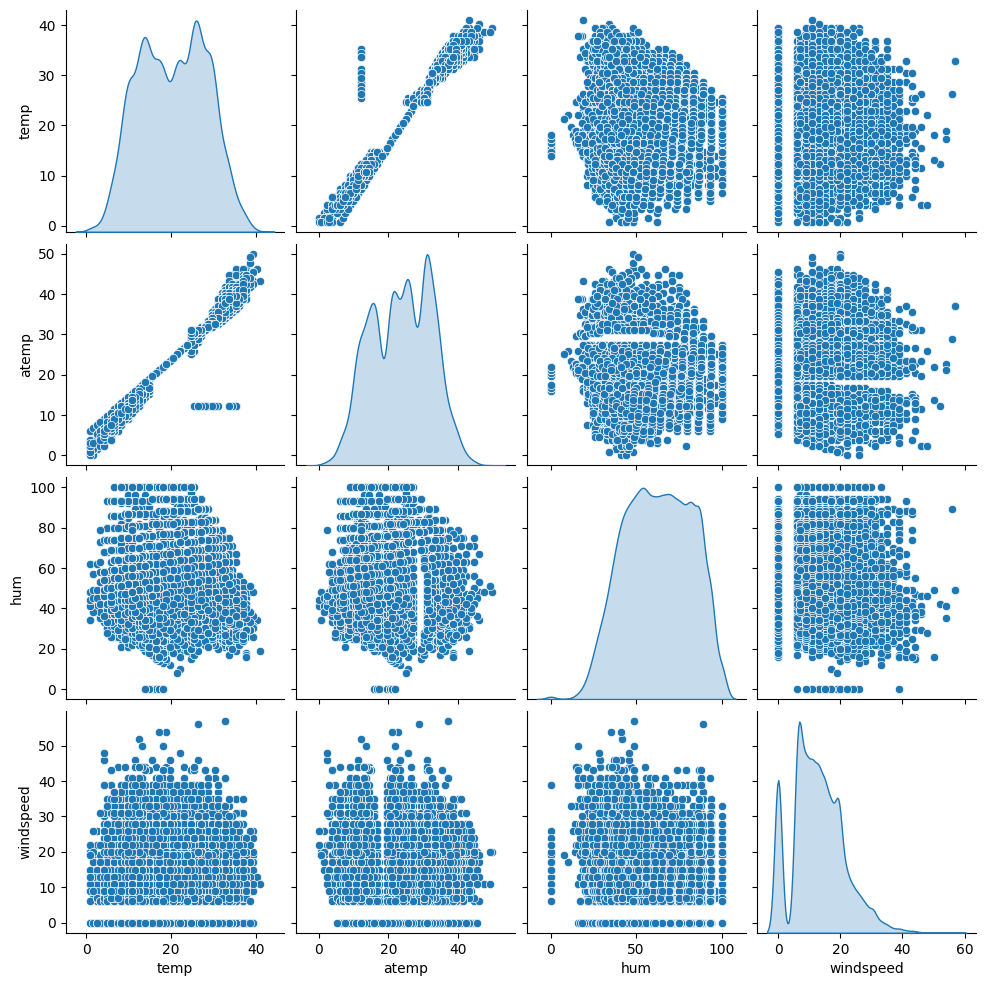

In [32]:
sns.pairplot(data=df_hour_num, diag_kind='kde')

Berdasarkan hasil pengamatan grafik atau diagram analisis multivariat di atas untuk masing-masing DataFrame `df_day` dan `df_hour`, dapat dilihat bahwa keduanya memiliki korelasi yang sangat kuat bernilai positif pada kolom atau atribut data `temp` dan `atemp`. Sedangkan pada kolom atau atribut data `hum` dan `windspeed` hampir sama sekali tidak memiliki korelasi dengan kolom atau atribut data yang lainnya.

# **5. Explanatory Data Analysis**

## **5.1 Pola Penggunaan Layanan *Bike Sharing* Sepanjang Tahun, Bulan, dan Jam**

### **5.1.1 Tahun**

In [33]:
df_year = df_day.groupby('yr').instant.nunique().reset_index()
df_year.rename(columns={'instant': 'sum'}, inplace=True)
df_year

,yr,sum
0,2011,365
1,2012,366


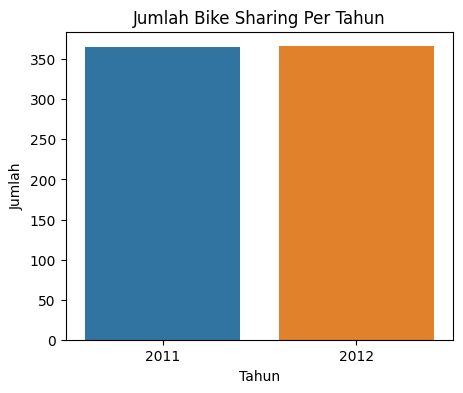

In [34]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_year.sort_values('yr', ascending=False),
    x='yr',
    y='sum',
)

plt.title('Jumlah Bike Sharing Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

### **5.1.2 Bulan**

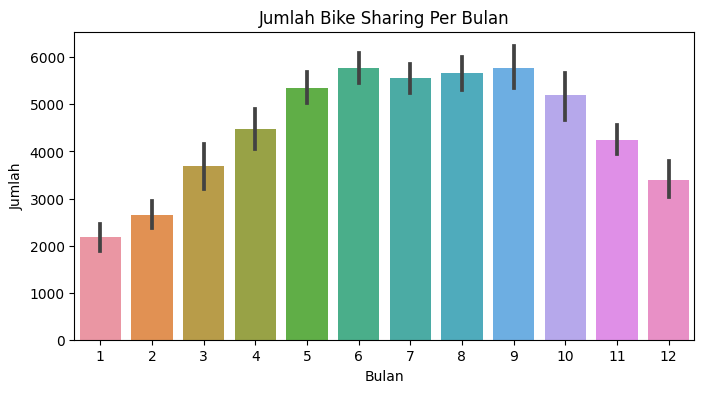

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_day.sort_values('mnth', ascending=False),
    x='mnth',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### **5.1.3 Jam**

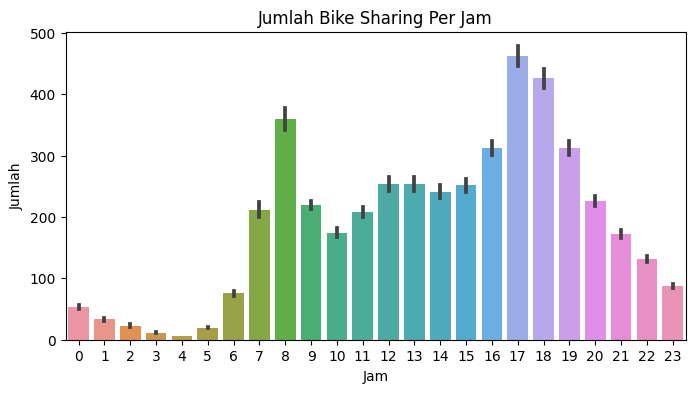

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_hour.sort_values('hr', ascending=False),
    x='hr',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

## **5.2 Pengaruh Hari Libur Terhadap Penggunaan Layanan *Bike Sharing***

In [37]:
df_holiday = df_day.groupby('holiday').instant.nunique().reset_index()
df_holiday.rename(columns={'instant': 'sum'}, inplace=True)
df_holiday

,holiday,sum
0,Holiday,21
1,Not Holiday,710


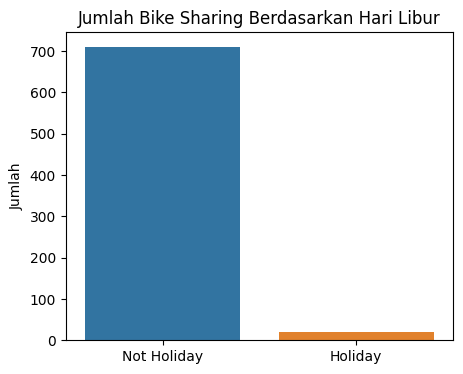

In [38]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_holiday.sort_values('holiday', ascending=False),
    x='holiday',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Hari Libur')
plt.xlabel(None)
plt.ylabel('Jumlah')
plt.show()

## **5.3 Pengaruh Hari Kerja Terhadap Penggunaan Layanan *Bike Sharing***

In [39]:
df_workingday = df_day.groupby('workingday').instant.nunique().reset_index()
df_workingday.rename(columns={'instant': 'sum'}, inplace=True)
df_workingday

,workingday,sum
0,Holiday,231
1,Working Day,500


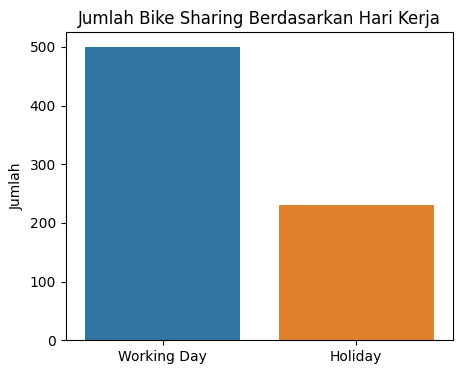

In [40]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_workingday.sort_values('workingday', ascending=False),
    x='workingday',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Hari Kerja')
plt.xlabel(None)
plt.ylabel('Jumlah')
plt.show()

## **5.4 Pengrauh Cuaca Terhadap Penggunaan Layanan *Bike Sharing***

In [41]:
df_weathersit = df_day.groupby('weathersit').instant.nunique().reset_index()
df_weathersit.rename(columns={'instant': 'sum'}, inplace=True)
df_weathersit

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


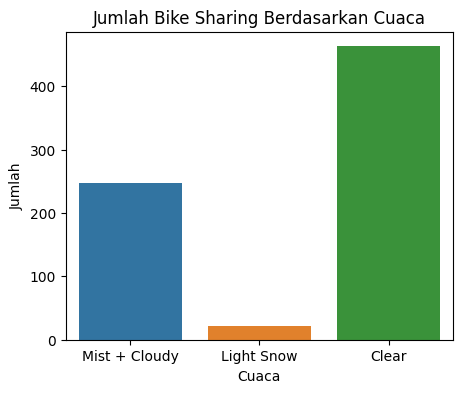

In [42]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_weathersit.sort_values('weathersit', ascending=False),
    x='weathersit',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.show()

## **5.5 Pengaruh Musim Terhadap Penggunaan Layanan *Bike Sharing***

In [43]:
df_season = df_day.groupby('season').instant.nunique().reset_index()
df_season.rename(columns={'instant': 'sum'}, inplace=True)
df_season

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


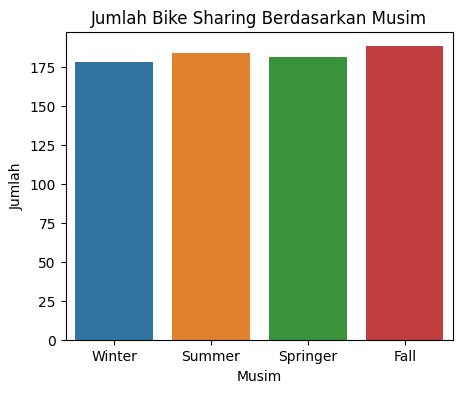

In [44]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_season.sort_values('season', ascending=False),
    x='season',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.show()

## **5.6 Pengaruh Lingkungan Terhadap Penggunaan Layanan *Bike Sharing***

### **5.6.1 Analisis Regresi pada Temperatur**

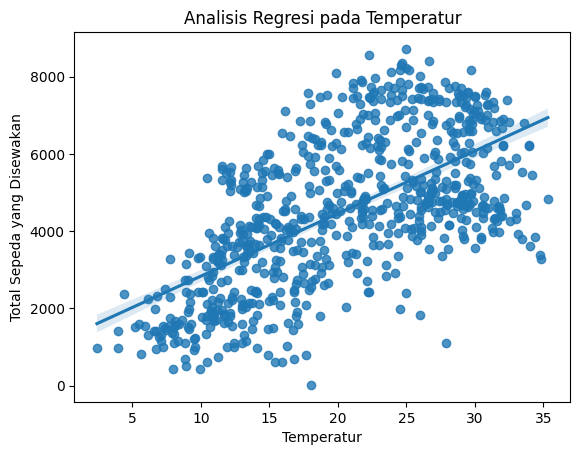

In [45]:
sns.regplot(x=df_day['temp'], y=df_day['cnt'])
plt.title('Analisis Regresi pada Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

### **5.6.2 Analisis Regresi pada Rata-rata Temperatur**

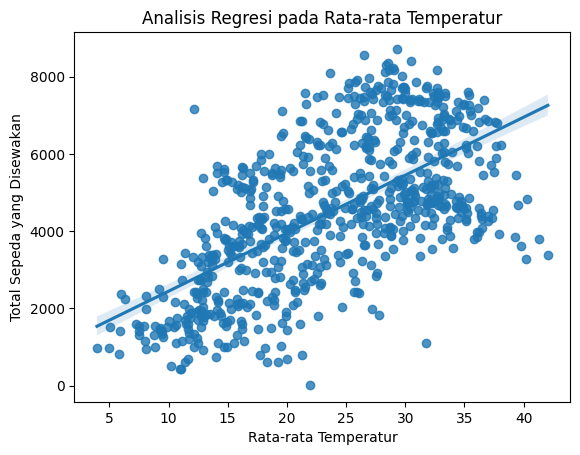

In [46]:
sns.regplot(x=df_day['atemp'], y=df_day['cnt'])
plt.title('Analisis Regresi pada Rata-rata Temperatur')
plt.xlabel('Rata-rata Temperatur')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

### **5.6.3 Analisis Regresi pada Kelembapan**

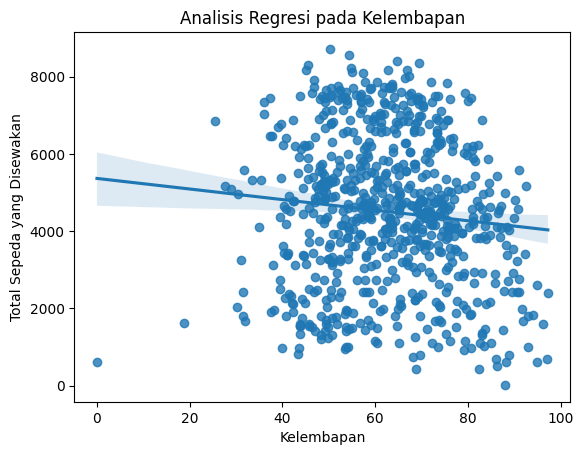

In [47]:
sns.regplot(x=df_day['hum'], y=df_day['cnt'])
plt.title('Analisis Regresi pada Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

### **5.6.4 Analisis Regresi pada Kecepatan Angin**

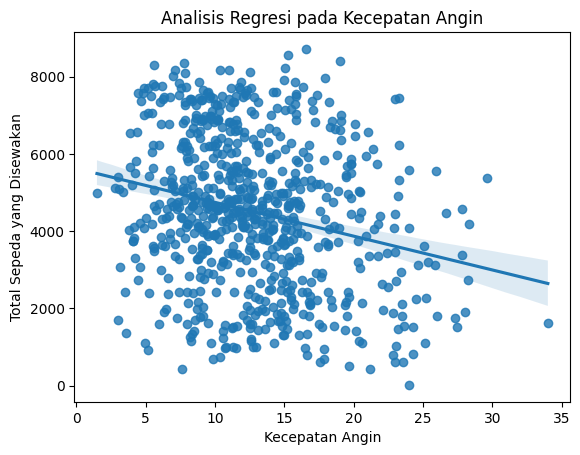

In [48]:
sns.regplot(x=df_day['windspeed'], y=df_day['cnt'])
plt.title('Analisis Regresi pada Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

### **5.6.5 Analisis Terhadap Temperatur, Kelembapan, dan Kecepatan Angin**

In [49]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,12,Not Holiday,Thu,Working Day,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,Springer,2012,12,Not Holiday,Fri,Working Day,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,Springer,2012,12,Not Holiday,Sat,Holiday,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,Springer,2012,12,Not Holiday,Sun,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [50]:
import plotly.express as px
fig = px.scatter_3d(
    df_day,
    x='temp',
    y='hum',
    z='windspeed',
    color='season'
)
fig.show()

# **6. Kesimpulan**

- Berdasarkan pengamatan pada DataFrame `df_season` pada kolom `season` dan `sum`, terlihat bahwa jumlah penggunaan *bike sharing* tertinggi terjadi pada musim gugur (*fall*). Hal ini menunjukkan bahwa musim gugur memiliki pengaruh yang kuat terhadap penggunaan *bike sharing*.
- Dari analisis DataFrame `df_yr` pada kolom `yr` dan `sum`, ditemukan bahwa tren penggunaan *bike sharing* paling tinggi terjadi pada tahun 2012. Dengan demikian, dapat disimpulkan bahwa tren penggunaan *bike sharing* paling tinggi terjadi pada tahun 2012.
- Hasil pengamatan pada DataFrame `df_day` pada kolom `mnth` dan `cnt` menunjukkan bahwa, bulan dengan jumlah penggunaan *bike sharing* terbanyak adalah bulan Juni. Oleh karena itu, dapat disimpulkan bahwa bulan Juni memiliki tren penggunaan *bike sharing* yang tinggi.
- Dalam analisis pada DataFrame `df_hour` pada kolom `hour` dan `cnt`, terlihat bahwa jam dengan jumlah penggunaan *bike sharing* terbanyak adalah jam 17 atau jam 5 sore. Oleh karena itu, dapat disimpulkan bahwa jam 17 atau jam 5 sore memiliki tren penggunaan *bike sharing* yang tinggi.
- Melalui pengamatan pada DataFrame `df_holiday` pada kolom `holiday` dan `sum`, dapat dilihat bahwa jumlah penggunaan *bike sharing* lebih tinggi pada hari biasa atau bukan hari libur. Dengan demikian, dapat disimpulkan bahwa adanya hari libur tidak terlalu berpengaruh terhadap penggunaan *bike sharing*.
- Hasil pengamatan pada DataFrame `df_working` pada kolom `workingday` dan `sum` menunjukkan bahwa, jumlah penggunaan *bike sharing* lebih tinggi pada hari kerja. Oleh karena itu, dapat disimpulkan bahwa hari kerja berpengaruh terhadap penggunaan *bike sharing*.
- Dalam analisis DataFrame `df_day`, ditemukan bahwa suhu (`temp`) dan jumlah penggunaan *bike sharing* memiliki hubungan yang positif, begitu pula dengan suhu rata-rata (`atemp`) dan jumlah penggunaan *bike sharing*. Selain itu, kelembapan (`hum`) juga berpengaruh jika berada dalam rentang 40-85%, dan kecepatan angin (`windspeed`) berpengaruh jika kecepatannya berada dalam rentang 3-20 knot. Dengan demikian, dapat disimpulkan bahwa faktor lingkungan yang berpengaruh terhadap penggunaan *bike sharing* adalah suhu (`temp`), suhu rata-rata (`atemp`), kelembapan (`hum`) dalam rentang 40-85%, dan kecepatan angin (`windspeed`) dalam rentang 3-20 knot.

# **7. Dataset Export**

In [51]:
data_clean = 'data.csv'
df_day.to_csv(data_clean, index=False)

In [52]:
files.download(data_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kode di atas akan melakukan proses pengunduhan file dataset yang telah dibersihan (*cleaned dataset*) secara otomatis dengan cara menjalankan blok kode di atas.